In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson
import pyreadr
%matplotlib inline

In [31]:
PATH = './data.RData'
w_PATH = './ch2data.csv'

data = pyreadr.read_r(PATH)
print(data.keys())
df1 = data['data']
df1
df = pd.DataFrame(df1)

df.to_csv(w_PATH)

odict_keys(['data'])


In [32]:
df.head(10)

,data
0,2.0
1,2.0
2,4.0
3,6.0
4,4.0
5,5.0
6,2.0
7,3.0
8,1.0
9,2.0


In [33]:
df.describe()

,data
count,50.00000
mean,3.56000
std,1.72804
min,0.00000
25%,2.00000
50%,3.00000
75%,4.75000
max,7.00000


In [34]:
df.value_counts()

data
3.0     12
2.0     11
4.0     10
5.0      5
6.0      4
7.0      4
1.0      3
0.0      1
dtype: int64

In [35]:
df.max()[0]

7.0

(array([ 1.,  3., 11., 12., 10.,  5.,  4.,  4.]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 <BarContainer object of 8 artists>)

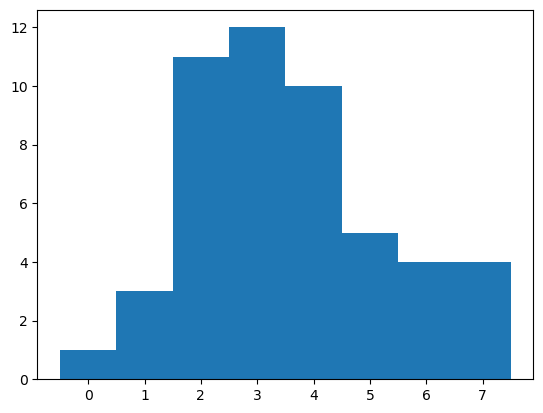

In [36]:
plt.hist(df,bins=8,range=(df.min()[0],df.max()[0]+1),align='left')

In [37]:
df.var()

data    2.986122
dtype: float64

In [38]:
df.std()

data    1.72804
dtype: float64

In [39]:
np.sqrt(df.var())

data    1.72804
dtype: float64

In [50]:
mean = df.mean()
k_list = range(10)
prob = poisson.pmf(k_list,mean)
prob

array([0.02843882, 0.10124222, 0.18021114, 0.21385056, 0.190327  ,
       0.13551282, 0.08040427, 0.04089132, 0.01819664, 0.00719778])

(array([ 1.,  3., 11., 12., 10.,  5.,  4.,  4.]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 <BarContainer object of 8 artists>)

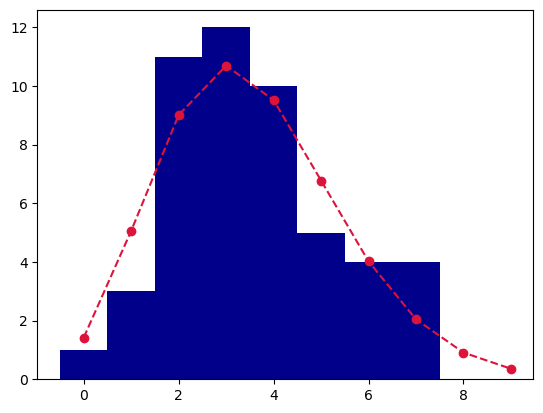

In [51]:
plt.plot(k_list,prob*50.,marker='o',color='crimson',linestyle='--')
plt.hist(df,bins=8,range=(df.min()[0],df.max()[0]+1),align='left',color='darkblue')

In [93]:
def calc_log_lik_func_1(ndarraydata,mean):
    log_lik = 0.
    for y_i in ndarraydata:
        tempvalue = 0.
        
        if y_i!=0:
            for j in range(1,int(y_i)+1):
                tempvalue += np.log(j)
        
        log_lik += y_i * np.log(mean) - mean - tempvalue
            
    return log_lik

In [94]:
def calc_log_lik_func_2(ndarraydata,mean):
    log_lik = 0.
    for y_i in ndarraydata:
        log_lik += np.log(poisson.pmf(y_i,mean))
    return log_lik

[-121.88118179]
[-109.42794468]
[-101.98912367]
[-98.22053578]
[-97.25515543]
[-98.50098365]
[-101.53577164]
[-106.04774654]
[-111.80014457]


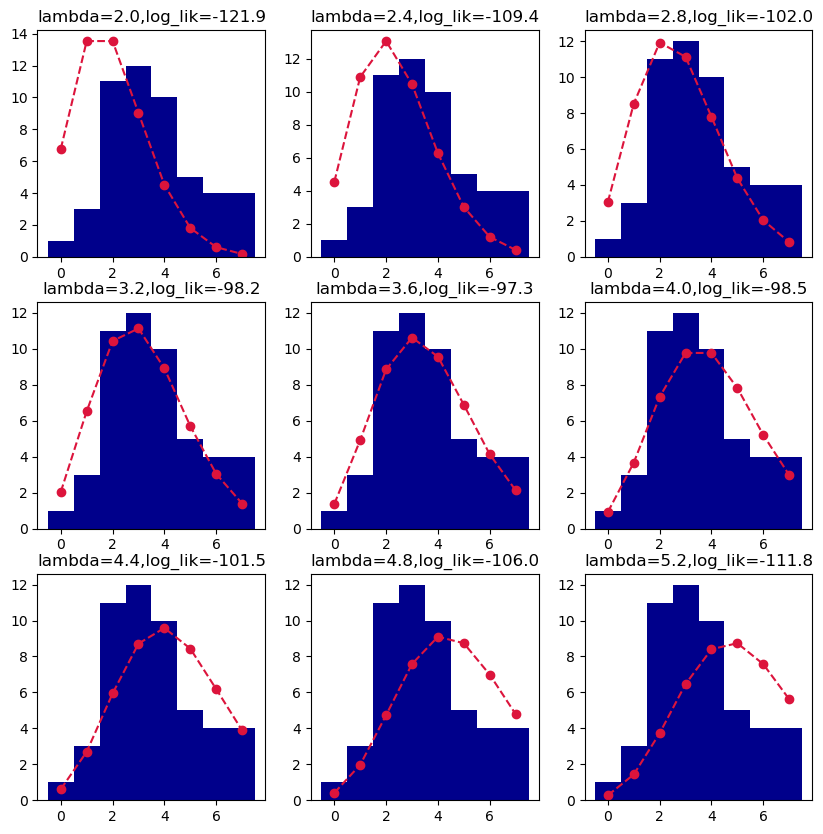

In [96]:
plt.figure(figsize=(10,10))
meanrange = np.arange(2., 5.3, 0.4)
df_ndarray = df.to_numpy()
k_list_2 = range(8)
for i in range(int(len(meanrange))):
    log_lik = calc_log_lik_func_1(df_ndarray,meanrange[i])
    print(log_lik)
    prob_i = poisson.pmf(k_list_2,meanrange[i])
    plt.subplot(3,3,i+1)
    plt.hist(df,bins=8,range=(df.min()[0],df.max()[0]+1),align='left',color='darkblue')
    plt.plot(k_list_2,prob_i*50.,marker='o',color='crimson',linestyle='--')
    plt.title('lambda={:.1f},log_lik={:.1f}'.format(meanrange[i],log_lik[0]))